# Comparision of MSEs

My motivation to prepare this notes comes fromt the following [blog post](https://towardsdatascience.com/statistics-in-ml-estimating-population-variance-1f484184f247).

Under normal distribution, when $\mu$ and $\sigma^2$ are both unknown, we have two possible estimators to estimate the population variance:

1) The sample variance estimator: $s^2 = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n-1}$, and 
2) The maximum likelihood estimator: $\hat{ \sigma^2} = \frac{\sum_{i=1}^{n}(x_i-\bar x)^2}{n}$.

In the class, we showed that

1. $E(s^2) = \sigma^2$,
2. $Bias(s^2) = 0$,
3. $Var(s^2) = \frac{2 \sigma^4}{n-1}$, and
4. $MSE(s^2) = \frac{2 \sigma^4}{n-1}$.

Similarly, 

1. $E(\hat{ \sigma}^2) = \frac{(n-1)\sigma^2}{n}$,
2. $Bias(\hat{ \sigma^2}) = -\frac{\sigma^2}{n}$,
3. $Var(\hat{ \sigma^2}) = \frac{2 (n-1) \sigma^4}{n^2}$, and
4. $MSE(\hat{ \sigma^2}) = \frac{(2n-1) \sigma^4}{n^2}$.

First generate N number of different synthetic samples with size of n under normal distribution for a given values of $\mu$ and $\sigma^2$. 

In [40]:
import numpy as np

np.random.seed(123)
n = 10  #sample size
N = 100000  #number of repeatitions (repeated sampling)
mu = 0  #true population mean
sigma2 = 1  #true population variance
exp_data = np.random.normal(loc = mu, scale = sigma2, size = (n, N))

Then define a Python function which calcualates bias, variance, and mse for two variance estimators: $s^2$ and $\hat{ \sigma}^2$ for a given data. 

In [41]:
# if ddof = 0, np.var function uses n in the divisor
# if ddof = 1,np.var function uses n-1 in the divisor
# see https://numpy.org/doc/stable/reference/generated/numpy.var.html
def Varestimator_performance(data, ddof=1):

    est = data.var(axis = 0, ddof = ddof)  #calculates variance estimator for each sample over N repetitions
    avg = est.mean() #find the mean of N variance estimates
    bias = avg-sigma2  #find the difference between true sigma2. 
    var = est.var()  #find the variance of N variance estimates #not sure ddof here. default 0.
    
    return bias, var, var + bias**2

to_print = ("{}: Bias = {:.4f}, Variance = {:.4f}, MSE = {:.4f}")


Print the performance of $s^2$.

In [42]:
print(to_print.format("Sample Variance Estimator Performance", *Varestimator_performance(exp_data, ddof=1)))

Sample Variance Estimator Performance: Bias = 0.0001, Variance = 0.2225, MSE = 0.2225


Print the performance of $\hat{ \sigma}^2$.

In [43]:
print(to_print.format("MLE Variance Estimator Performance", *Varestimator_performance(exp_data, ddof=0)))

MLE Variance Estimator Performance: Bias = -0.0999, Variance = 0.1802, MSE = 0.1902


As we can see, sample variance estimator produces a nearly zero bias, whereas MLE estimator gives a downward bias. On the other hand, the variance and MSE of MLE estimator are smaller compared to those of the sample variance.

Let's investigate how bias, variance, mse difference between two variance estimators change with respect to different number of sample sizes and sigma2 values.

In [56]:
sample_sizes = [10, 100, 1000]
true_sigma2s = [1, 10, 100]

#create a two-dimensional array for each metric. For each metric, one dimension is
#sample size, the other one is true value of sigma

gaps = np.zeros(shape=(3, len(sample_sizes), len(true_sigma2s))) 

for i in range(len(sample_sizes)):
    for j in range(len(true_sigma2s)):
        exp_data = np.random.normal(loc = mu, scale = true_sigma2s[j], size = (sample_sizes[i], N))
        gap = np.array(Varestimator_performance(data = exp_data, ddof=1)) -  np.array(Varestimator_performance(data = exp_data, ddof=0))

        for metric, result in enumerate(gap):
            gaps[metric, i, j] = result

Illustrate the results on a heatmap.

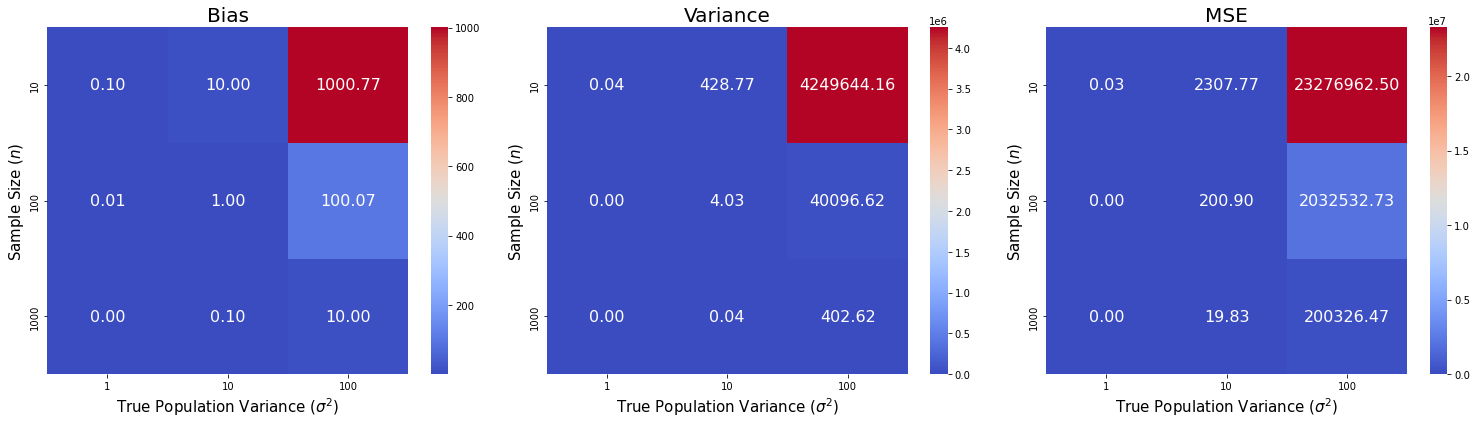

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["Bias", "Variance", "MSE"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

for m in range(len(metrics)):
    sns.heatmap(gaps[m], ax=axes[m], cmap="coolwarm",
                annot=True, annot_kws={'size': 16}, fmt="0.2f",
                xticklabels=true_sigma2s, yticklabels=sample_sizes)
    axes[m].set_xlabel(r"True Population Variance ($\sigma^2$)", size=15)
    axes[m].set_ylabel(r"Sample Size ($n$)", size=15)
    axes[m].set_title(metrics[m], size=20)

fig.tight_layout()

We can see that the gaps in bias, variance, and MSE between the sample variance estimator and the MLE estimator decrease as sample size increases. However, the gaps increase as population variances increases. 